Preliminaries

In [ ]:
# preliminaries 
import numpy as np
import pandas as pd
import holoviews as hv 
from datetime import datetime 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pygal 
from pywaffle import Waffle
import squarify
import seaborn as sns
import joypy

# import dataset
listings_details = pd.read_csv('listings_details.csv')
listings_summary = pd.read_csv('listings_summary.csv')
reviews_details = pd.read_csv('reviews_details.csv')
reviews_summary = pd.read_csv('reviews_summary.csv')
calendar = pd.read_csv('calendar.csv')

reviews_summary['date'] = pd.to_datetime(reviews_summary.date)
reviews_details['date'] = pd.to_datetime(reviews_details.date)

Percentage of Reviews

In [2]:
def B0():
    df1 = reviews_details[['listing_id', 'date', 'reviewer_id']].drop_duplicates()
    df1['year'] = df1.date.apply(lambda x: x.year)
    df2 = df1.groupby('year').size().reset_index()
    df2.columns = ['year', 'n_of_reviews']
    df2['percentage'] = df2['n_of_reviews'] * 100 / sum(df2.n_of_reviews)
    return df2
YearPercentage = B0()

def B0_i():
    df1 = reviews_details[['listing_id', 'date', 'reviewer_id']].drop_duplicates()
    df1['year'] = df1.date.apply(lambda x: x.year)
    df1['month'] = df1.date.apply(lambda x: x.month)
    df2 = df1.groupby(['year', 'month']).size().reset_index()
    #df2 = df1.groupby('year_month').size().reset_index()
    df2.columns = ['year','month','n_of_reviews']   
    return df2
MonthlyInfo = B0_i()
First_9_month = MonthlyInfo.query('month <= 9')
First_9_month = First_9_month.groupby(['year']).n_of_reviews.sum().reset_index()
First_9_month['percentage'] =  First_9_month.n_of_reviews * 100/ First_9_month.n_of_reviews.sum()
First_9_month = pd.DataFrame({'year':['other', 2017, 2018, 2019], 'percentage':[First_9_month.percentage[0:8].sum(), First_9_month.percentage[8], First_9_month.percentage[9], First_9_month.percentage[10]]})

Season1 = MonthlyInfo.query('month in [1,2,3]').groupby('year').n_of_reviews.sum().reset_index()
Season1Percentage = pd.DataFrame({'year':['others', 2017, 2018, 2019], 'percentage':([Season1.n_of_reviews[0:8].sum(),Season1.n_of_reviews[8], Season1.n_of_reviews[9], Season1.n_of_reviews[10]] / Season1.n_of_reviews.sum())*100})
Season2 = MonthlyInfo.query('month in [4,5,6]').groupby('year').n_of_reviews.sum().reset_index()
Season2Percentage = pd.DataFrame({'year':['others', 2017, 2018, 2019], 'percentage':([Season2.n_of_reviews[0:8].sum(),Season2.n_of_reviews[8], Season2.n_of_reviews[9], Season2.n_of_reviews[10]] / Season2.n_of_reviews.sum())*100})
Season3 = MonthlyInfo.query('month in [7,8,9]').groupby('year').n_of_reviews.sum().reset_index()
Season3Percentage = pd.DataFrame({'year':['others', 2017, 2018, 2019], 'percentage':([Season3.n_of_reviews[0:8].sum(),Season3.n_of_reviews[8], Season3.n_of_reviews[9], Season3.n_of_reviews[10]] / Season3.n_of_reviews.sum())*100})

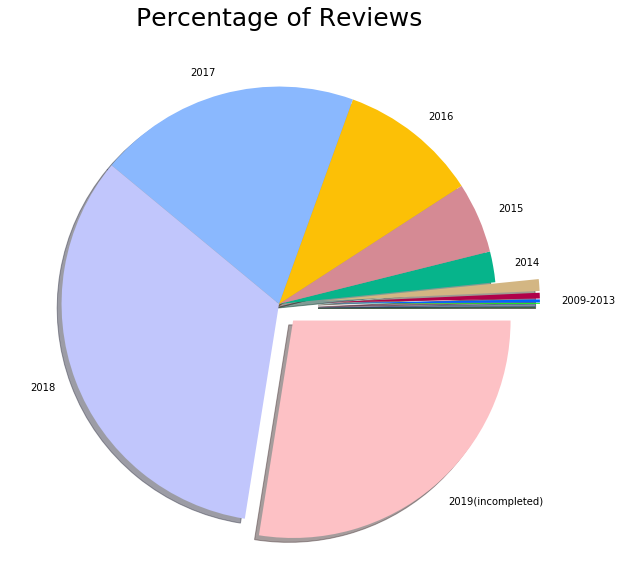

In [3]:
#draw:
# draw1: original pie chart 
fig, ax = plt.subplots(figsize = (10,10))
color = ['xkcd:bright pink', 'xkcd:neon green', 'xkcd:bright blue', 'xkcd:raspberry', 'xkcd:very light brown', 'xkcd:green blue', 'xkcd:dusty pink', 'xkcd:marigold', 'xkcd:carolina blue', 'xkcd:light periwinkle', 'xkcd:pale rose']
label = ['', '', '2009-2013', '', '', '2014', '2015', '2016', '2017', '2018', '2019(incompleted)']
ax.pie(YearPercentage['n_of_reviews'], shadow = True, labels = label, explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0, 0 ,0.1), colors = color)
ax.set_title('Percentage of Reviews', fontsize = 25)
plt.show()

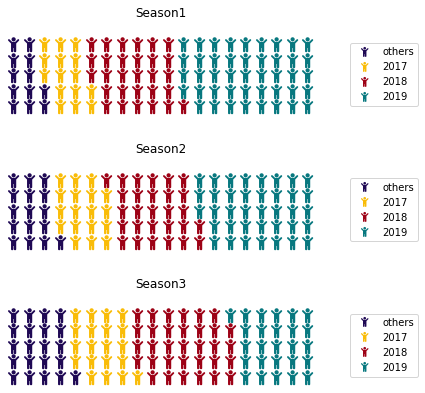

In [19]:
# draw2: seasons comparison: waffle 
data = dict(zip(Season1Percentage.year, Season1Percentage.percentage))
color = ['xkcd:dark indigo', 'xkcd:golden rod', 'xkcd:carmine', 'xkcd:deep aqua']
plot = {'311':{'values':Season1Percentage.percentage, 'labels':Season1Percentage.year.astype(str).to_list(), 'icons':'child', 'icon_size':15, 'icon_legend':True, 'title':{'label':'Season1\n'}, 'colors':color, 'legend':{'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}},
               '312':{'values':Season2Percentage.percentage, 'labels':Season2Percentage.year.astype(str).to_list(), 'icons':'child', 'icon_size':15, 'icon_legend':True, 'title':{'label':'Season2\n'}, 'colors':color, 'legend':{'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}},
               '313':{'values':Season3Percentage.percentage, 'labels':Season3Percentage.year.astype(str).to_list(), 'icons':'child', 'icon_size':15, 'icon_legend':True, 'title':{'label':'Season3\n'}, 'colors':color, 'legend':{'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}}} 
fig = plt.figure(FigureClass=Waffle, rows=5, plots = plot, figsize = (6,6))

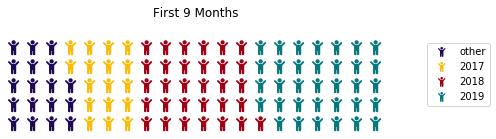

In [22]:
# plot the total 9 months
plot = {'111':{'values':First_9_month.percentage, 'labels':First_9_month.year.astype(str).to_list(), 'icons':'child', 'icon_size':15, 'icon_legend':True, 'title':{'label':'First 9 Months\n'}, 'colors':color, 'legend':{'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}}}
fig = plt.figure(FigureClass=Waffle, rows=5, plots = plot, figsize = (7,7))

Number of Reviews Distribution

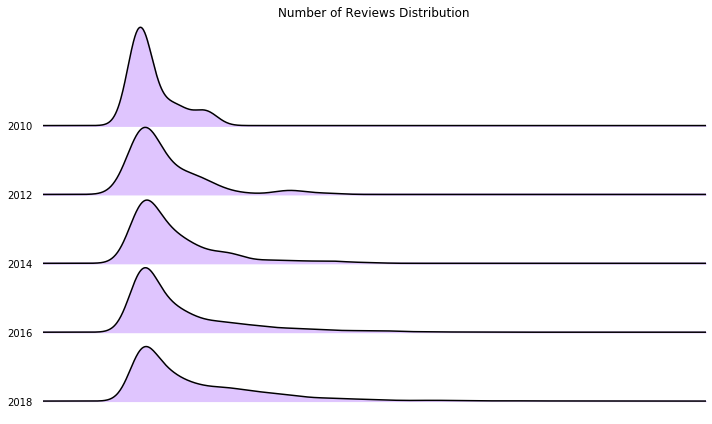

In [23]:
def B0_ii():
    df1 = reviews_details[['listing_id', 'date', 'reviewer_id']].drop_duplicates()
    df1['year'] = df1.date.apply(lambda x: x.year)
    df2 = df1.groupby(['listing_id', 'year']).size().reset_index()
    df2.columns = ['listing_id', 'year', 'n_of_reviews']
    df3 = df2.groupby('year').n_of_reviews.mean().reset_index()
    df3['std'] = df2.groupby('year').n_of_reviews.transform('std')
    df3['max'] = df2.groupby('year').n_of_reviews.transform('max')
    df3['min'] = df2.groupby('year').n_of_reviews.transform('min')
    df3['median'] = df2.groupby('year').n_of_reviews.transform('median')
    return df3
YearlyAvg = B0_ii()

def B0_iii():
    df1 = reviews_details[['listing_id', 'date', 'reviewer_id']].drop_duplicates()
    df1['year'] = df1.date.apply(lambda x: x.year)
    df2 = df1.groupby(['listing_id', 'year']).size().reset_index()
    df2.columns = ['listing_id', 'year', 'n_of_reviews']
    return df2
YearlyDistribution = B0_iii()

# draw
fig, ax = joypy.joyplot(YearlyDistribution.query('year in [2010, 2012, 2014, 2016, 2018]'), column = 'n_of_reviews', by = 'year', color = 'xkcd:light lavender',  figsize = (10,6), title = 'Number of Reviews Distribution', xlabels = False) # x_range = (1, 200)
plt.show()

Average Number of Reviews Per listing in Different Neibourhood Over Time

Text(0.5, 0.92, 'Average Number of Reviews Per listing in Different Neibourhood Over Time')

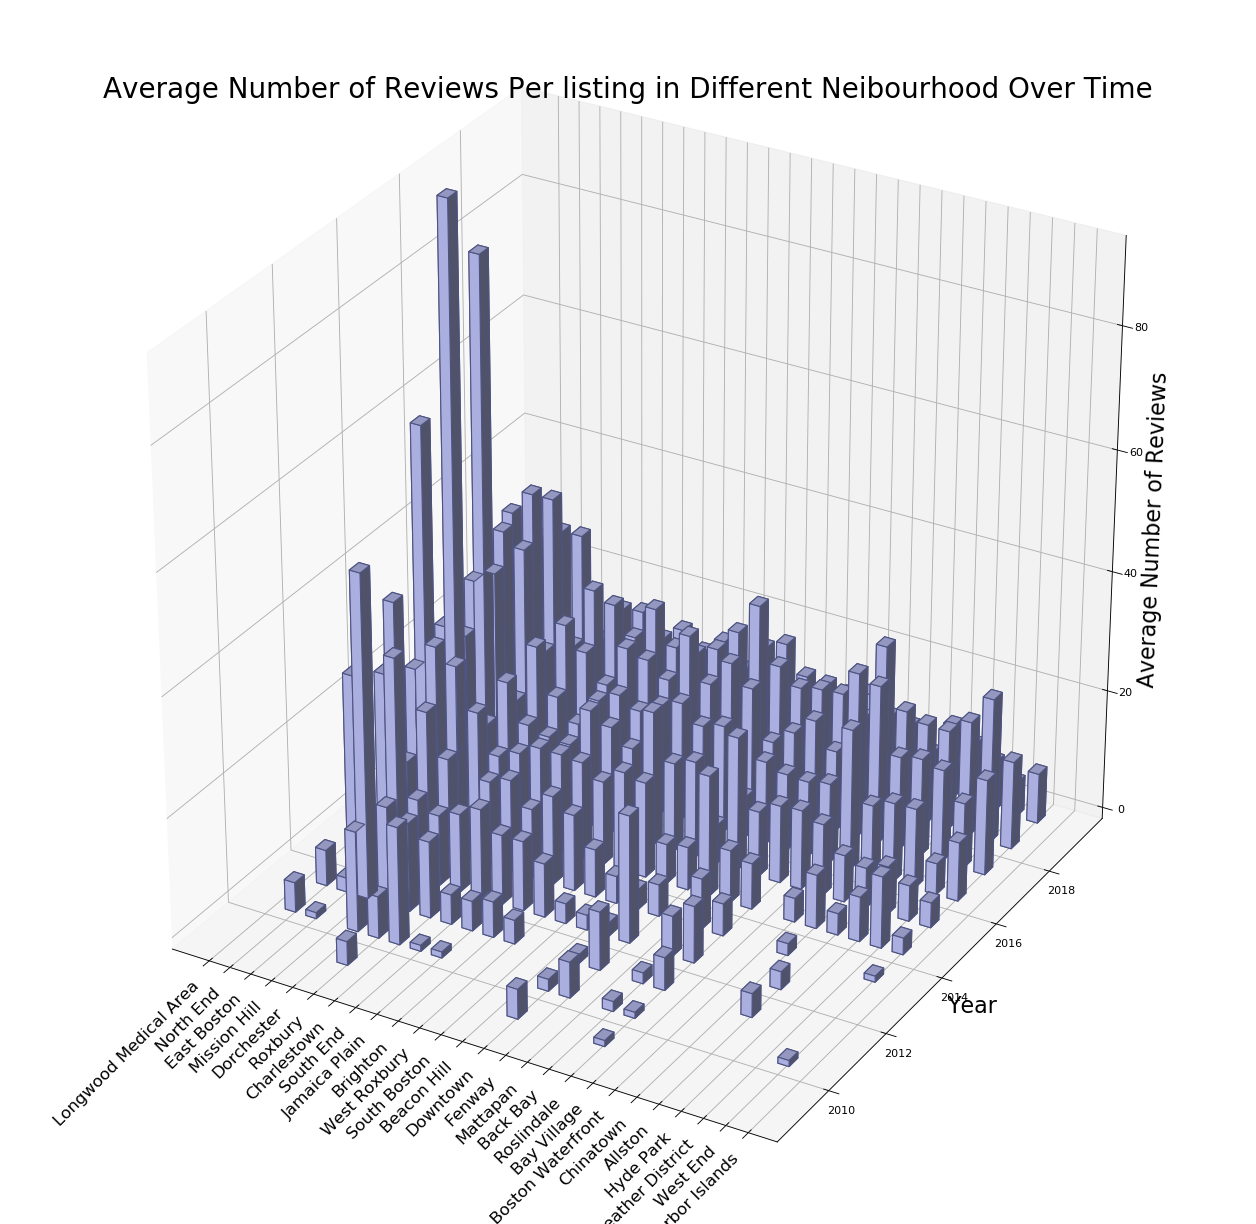

In [24]:
def B1():
    df1 = pd.merge(reviews_details[['listing_id', 'date', 'reviewer_id']].drop_duplicates(), listings_summary[['id', 'neighbourhood']].drop_duplicates(), left_on = 'listing_id', right_on = 'id', how = 'left')
    df1['year'] = df1.date.apply(lambda x: x.year)
    df1['NCustomers'] = df1.groupby(['listing_id', 'year']).reviewer_id.transform('count')
    df2 = df1[['listing_id', 'year', 'neighbourhood', 'NCustomers']].drop_duplicates().groupby(['neighbourhood', 'year']).NCustomers.mean().reset_index().sort_values(['neighbourhood', 'year'])
    return df2
AvgGuests = B1()
temp = AvgGuests.groupby('neighbourhood').NCustomers.sum().reset_index().sort_values('NCustomers', ascending = False)
temp = pd.merge(temp, listings_summary[['neighbourhood']].drop_duplicates(), on = 'neighbourhood', how = 'right')


neighbourhood = temp.neighbourhood.tolist()
neighbourhood_id = list(range(1, 27))
dict(zip(neighbourhood, neighbourhood_id))
AvgGuests['neighbourhood_id'] = AvgGuests.neighbourhood.replace(dict(zip(neighbourhood, neighbourhood_id)))

#draw
fig = plt.figure(figsize = (20, 20), dpi = 80)
ax = fig.add_subplot(111, projection='3d')

x3 = AvgGuests.neighbourhood_id.to_list()
y3 = AvgGuests.year.to_list()
z3 = np.zeros(AvgGuests.shape[0])

dx = np.repeat(0.5, AvgGuests.shape[0])
dy = np.repeat(0.3, AvgGuests.shape[0])
dz = AvgGuests.NCustomers.to_list()

ax.bar3d(x3, y3, z3, dx, dy, dz, shade = True, color = 'xkcd:light periwinkle', edgecolor = 'xkcd:dusk')
ax.set_xticks(neighbourhood_id)
ax.set_xticklabels(neighbourhood, rotation = 45, horizontalalignment='right', fontsize=15)
ax.set_ylabel('Year', fontsize = 20)
ax.set_zlabel('Average Number of Reviews', fontsize = 20)
ax.set_title('Average Number of Reviews Per listing in Different Neibourhood Over Time', fontsize = 25)

Number of New Hosts Each Year

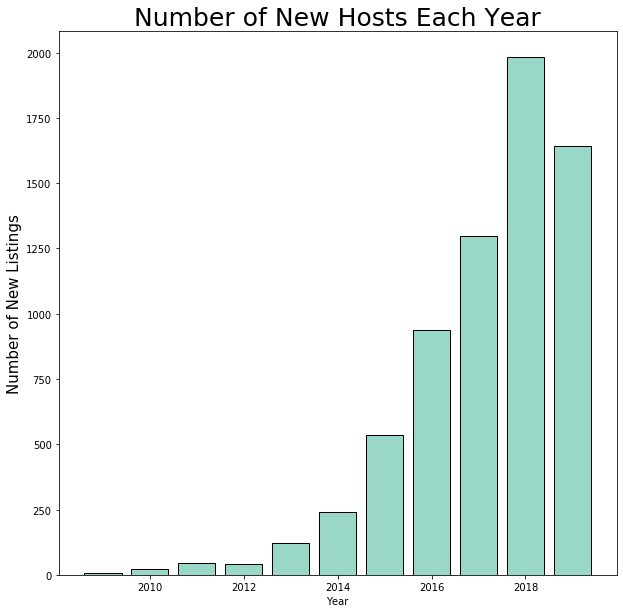

In [25]:
def B1_iii():
    df1 = reviews_details[['listing_id', 'date', 'reviewer_id']].drop_duplicates()
    df2 = df1.groupby('listing_id').date.min().reset_index()
    df2['year'] = df2.date.apply(lambda x: x.year)
    df3 = df2.groupby('year').listing_id.nunique().reset_index()
    return df3
NIncrease = B1_iii()
NIncrease.columns = ['year', 'n_of_new_hosts']
NIncrease['increase_rate'] = (NIncrease.n_of_new_hosts.diff().shift(-1) * 100 / NIncrease.n_of_new_hosts).shift(1)
NIncrease['is_increase'] = [1 if i > 0 else 0 for i in NIncrease.increase_rate]

fig, ax = plt.subplots(figsize = (10,10))
ax.bar(NIncrease.year, NIncrease.n_of_new_hosts, edgecolor = 'black', color = '#99d8c9')
ax.set_ylabel('Number of New Listings', fontsize = 15)
ax.set_xlabel('Year')
ax.set_title('Number of New Hosts Each Year', fontsize = 25)
plt.show()


Mean price and Availability of Each Room Type Across Neighbourhoods

In [ ]:
def B3_ii():
    df1 = listings_summary[['id', 'neighbourhood', 'reviews_per_month', 'availability_365', 'price']].reset_index()
    df2 = listings_details[['id', 'room_type', 'bedrooms', 'accommodates']].reset_index()
    df3 = pd.merge(df1, df2, on = ['index', 'id']).drop_duplicates()
    return df3

neighbourhood_details = B3_ii()

# private room
PrivateRoom = neighbourhood_details.query('room_type == "Private room" and price != 0')
PrivateRoom[['Avg_availability', 'Avg_price']] = PrivateRoom.groupby('id')[['availability_365', 'price']].transform('mean')
PrivateRoom_price = PrivateRoom.groupby('neighbourhood')[['Avg_price', 'availability_365']].median().reset_index() 
PrivateRoom_price.columns = ['neighbourhood', 'median', 'availability']

#Sharedroom
SharedRoom = neighbourhood_details.query('room_type == "Shared room" and price != 0')
SharedRoom[['Avg_availability', 'Avg_price']] = SharedRoom.groupby('id')[['availability_365', 'price']].transform('mean')
SharedRoom_price = SharedRoom.groupby('neighbourhood')[['Avg_price', 'availability_365']].median().reset_index() 
SharedRoom_price.columns = ['neighbourhood', 'median', 'availability']

#Entireroom
EntireRoom = neighbourhood_details.query('room_type == "Entire home/apt" and price != 0')
EntireRoom[['Avg_availability', 'Avg_price']] = EntireRoom.groupby('id')[['availability_365', 'price']].transform('mean')
EntireRoom_price = EntireRoom.groupby('neighbourhood')[['Avg_price', 'availability_365']].median().reset_index() 
EntireRoom_price.columns = ['neighbourhood', 'median', 'availability']

#Hotel room
HotelRoom = neighbourhood_details.query('room_type == "Hotel room" and price != 0')
HotelRoom[['Avg_availability', 'Avg_price']] =HotelRoom.groupby('id')[['availability_365', 'price']].transform('mean')
HotelRoom_price = HotelRoom.groupby('neighbourhood')[['Avg_price', 'availability_365']].median().reset_index() 
HotelRoom_price.columns = ['neighbourhood', 'median', 'availability']

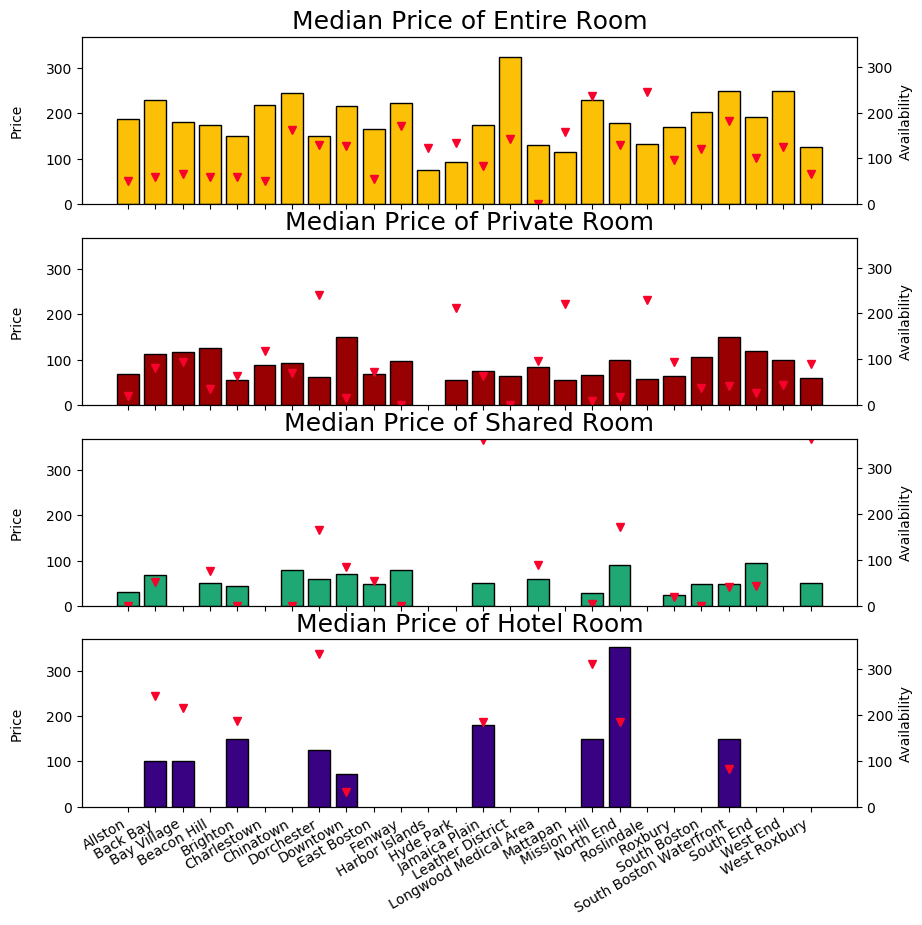

In [30]:
#Draw
Room_price = pd.merge(EntireRoom_price, PrivateRoom_price, on = 'neighbourhood', how = 'left')
Room_price = pd.merge(Room_price, SharedRoom_price, on = 'neighbourhood', how = 'left')
Room_price = pd.merge(Room_price, HotelRoom_price, on = 'neighbourhood', how = 'left')#fillna(0)
Room_price.columns = ['neighbourhood', 'Entire','Entire_ava', 'Private','Private_ava', 'Shared','Shared_ava', 'Hotel', 'Hotel_ava']

plt.style.use('default')
fig, ax = plt.subplots(4,1, figsize = (10,10), sharex = True, sharey = True)
ax[0].bar(Room_price.neighbourhood, Room_price.Entire, color = 'xkcd:marigold', edgecolor = 'black')
ax[0].set_title('Median Price of Entire Room', fontsize = 18)
ax[0].set_ylabel('Price\n')
ax0 = ax[0].twinx()
ax0.plot(Room_price.neighbourhood, Room_price.Entire_ava, marker = 'v', linestyle = 'None', color = 'xkcd:cherry red')
ax0.set_ylabel('Availability')
ax0.set_ylim(0,365)
ax[1].bar(Room_price.neighbourhood, Room_price.Private, color = 'xkcd:blood red', edgecolor = 'black')
ax[1].set_ylabel('Price\n')
ax[1].set_title('Median Price of Private Room', fontsize = 18)
ax1 = ax[1].twinx()
ax1.plot(Room_price.neighbourhood, Room_price.Private_ava, marker = 'v', linestyle = 'None', color = 'xkcd:cherry red')
ax1.set_ylabel('Availability')
ax1.set_ylim(0,365)
ax[2].bar(Room_price.neighbourhood, Room_price.Shared, edgecolor = 'black', color = 'xkcd:jade')
ax[2].set_ylabel('Price\n')
ax[2].set_title('Median Price of Shared Room', fontsize = 18)
ax2 = ax[2].twinx()
ax2.plot(Room_price.neighbourhood, Room_price.Shared_ava, marker = 'v', linestyle = 'None', color = 'xkcd:cherry red')
ax2.set_ylabel('Availability')
ax2.set_ylim(0,365)
ax[3].bar(Room_price.neighbourhood, Room_price.Hotel, edgecolor = 'black', color = 'xkcd:indigo')
ax[3].set_xticklabels(Room_price.neighbourhood, rotation = 30, horizontalalignment='right', fontsize=10)
ax[3].set_ylabel('Price\n')
ax[3].set_title('Median Price of Hotel Room', fontsize = 18)
ax3 = ax[3].twinx()
ax3.plot(Room_price.neighbourhood, Room_price.Hotel_ava, marker = 'v', linestyle = 'None', color = 'xkcd:cherry red')
ax3.set_ylabel('Availability')
ax3.set_ylim(0,365)
plt.show()

Joy Plot of Review Score Rating and Location Score by Neighbourhood

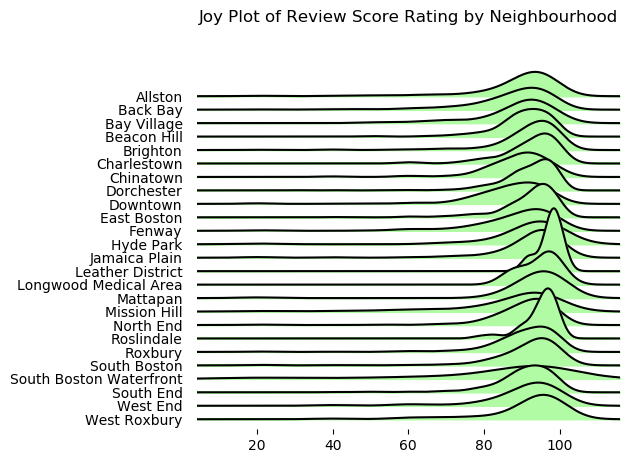

In [32]:
reviews_score = listings_details[['id', 'neighbourhood_cleansed', 'review_scores_location', 'review_scores_rating']].dropna()
reviews_score[['location_score', 'total_score']] = reviews_score.groupby('id')[['review_scores_location', 'review_scores_rating']].transform('mean')
score = reviews_score[['neighbourhood_cleansed', 'location_score', 'total_score']].drop_duplicates().reset_index().sort_values('neighbourhood_cleansed')

# draw
fig,ax = joypy.joyplot(score, column = 'total_score', by = 'neighbourhood_cleansed', color = 'xkcd:light pastel green', bins = 50, title = 'Joy Plot of Review Score Rating by Neighbourhood')
plt.show()

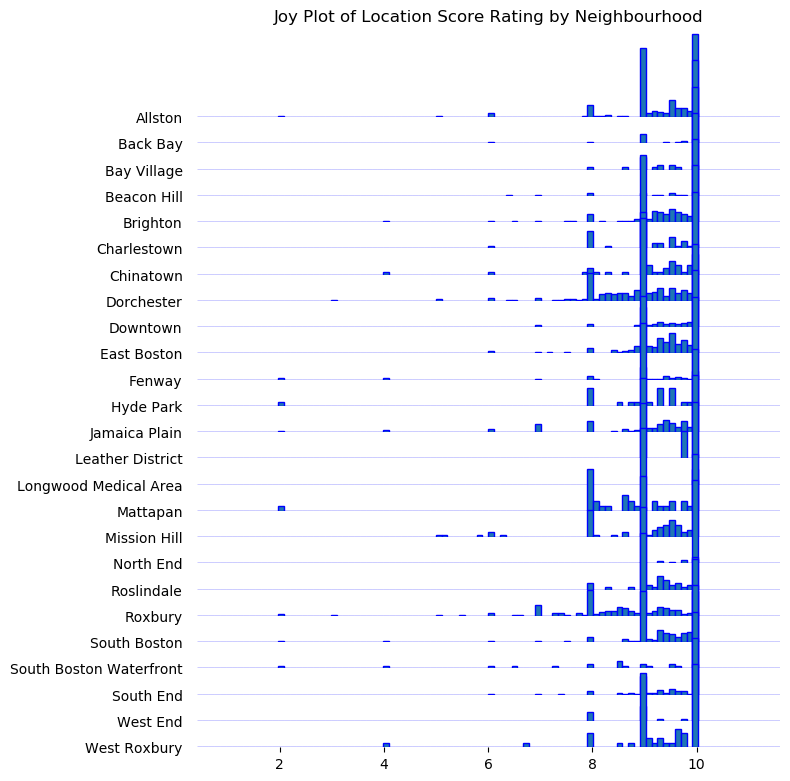

In [34]:
# draw2
fig,ax = joypy.joyplot(score, column = 'location_score', by = 'neighbourhood_cleansed', hist = True, bins = 100, linecolor = 'b', title = 'Joy Plot of Location Score Rating by Neighbourhood', ylim = 'own', figsize = (8, 8))
plt.show()

Jitter Plot of Location Score

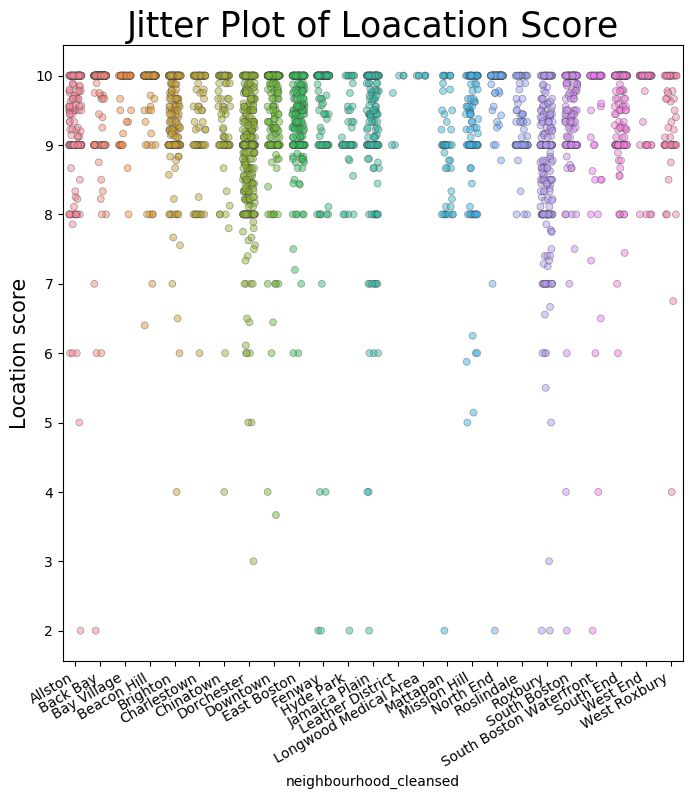

In [36]:
# location score 
fig, ax = plt.subplots(figsize = (8,8))
sns.stripplot(score.neighbourhood_cleansed, score.location_score,  jitter=0.25, size=5, ax=ax, linewidth=.5, alpha = 0.5)
ax.set_xticklabels(score.neighbourhood_cleansed.unique(), rotation = 30, horizontalalignment='right', fontsize=10)
ax.set_ylabel('Location score', fontsize = 15)
ax.set_title('Jitter Plot of Loacation Score', fontsize = 25)
plt.show()

The Number of Airbnbs in Different Neighbourhoods

[]

<Figure size 1200x1200 with 0 Axes>

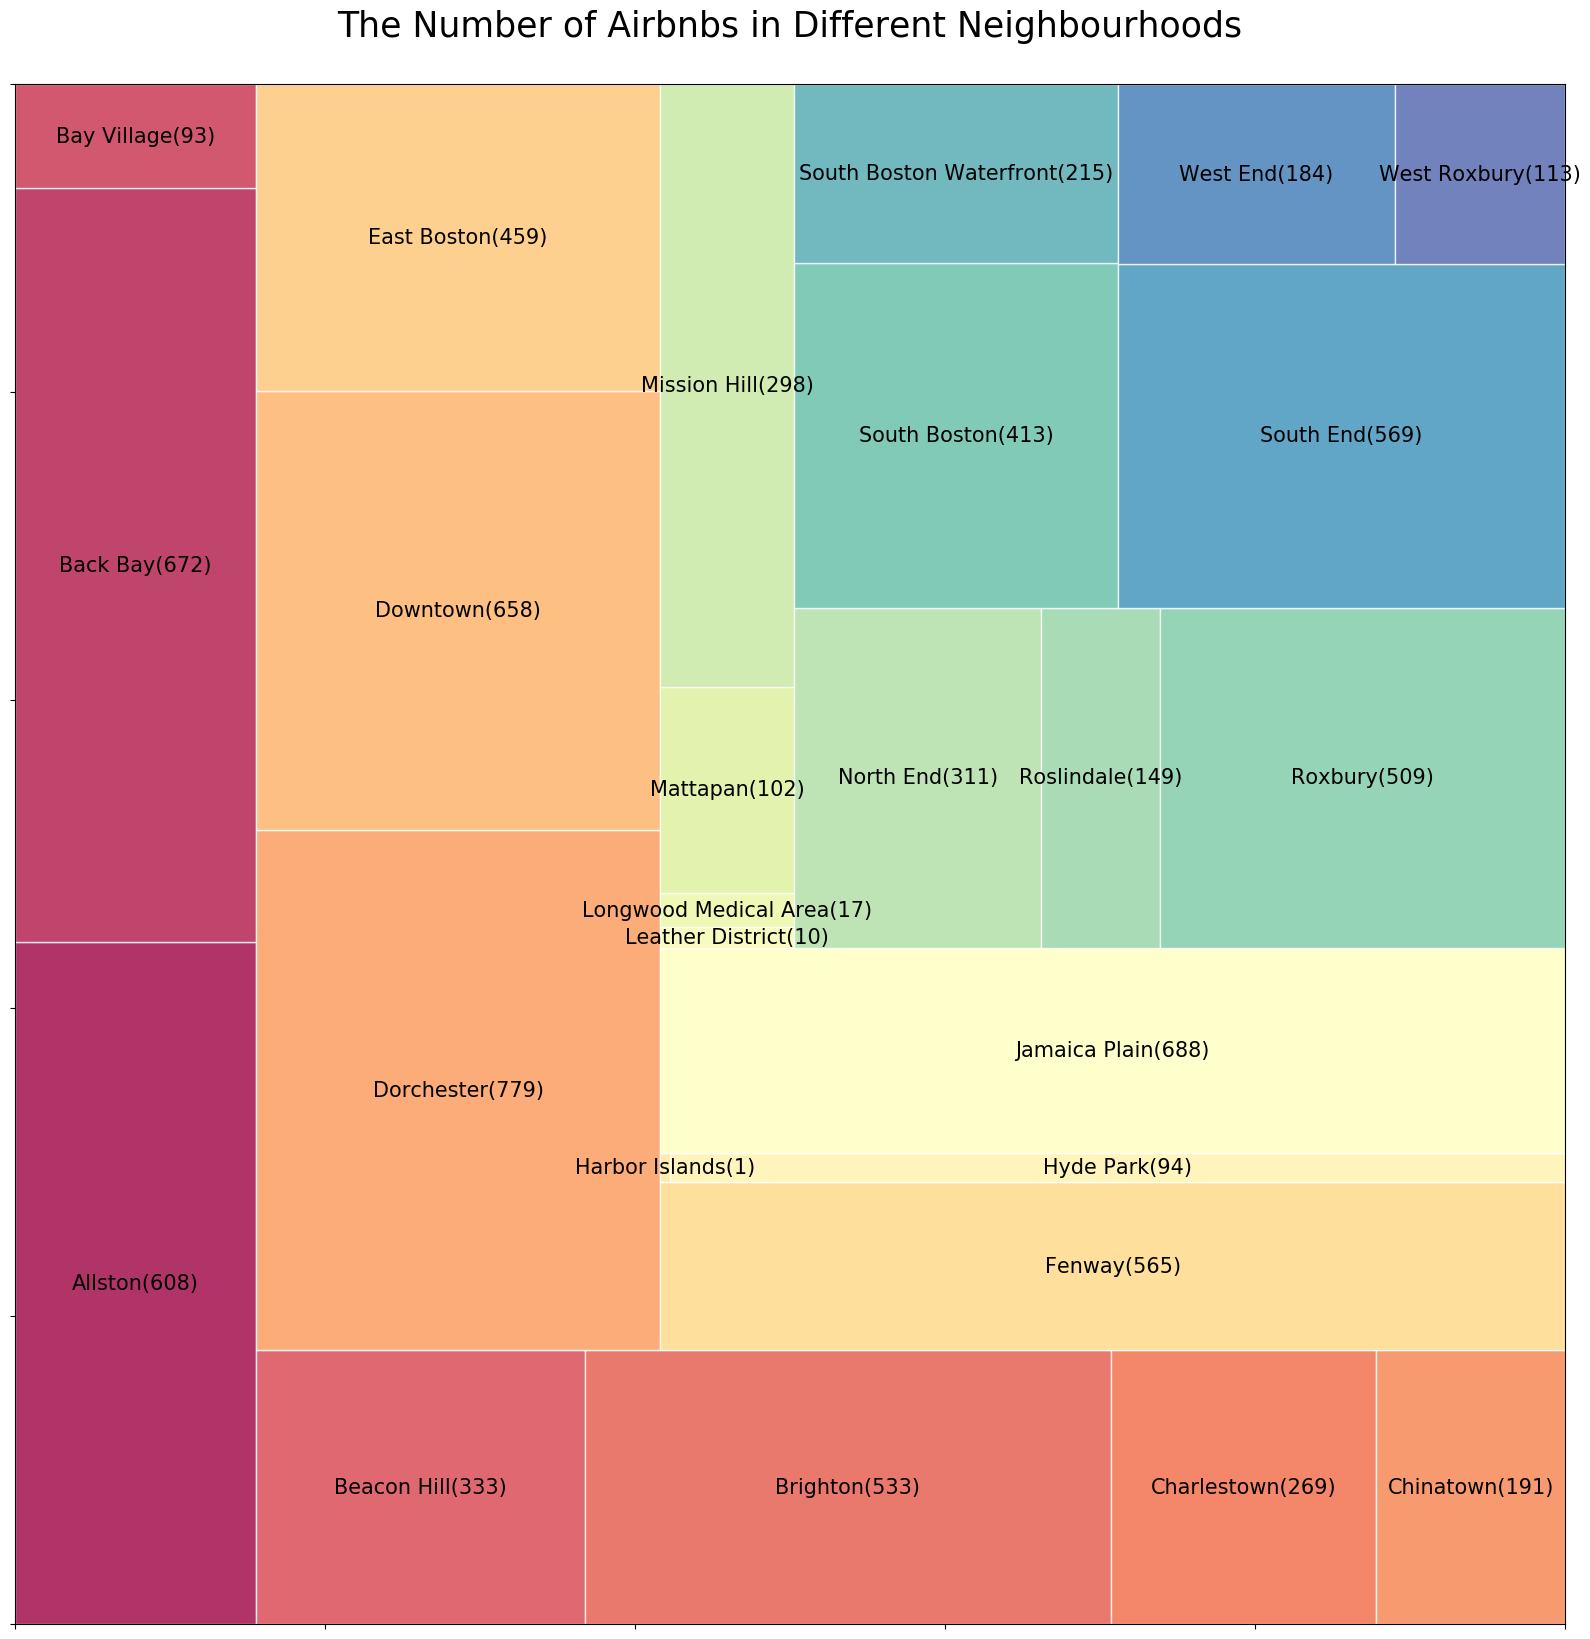

In [37]:
CountEach1 = listings_summary[['id', 'neighbourhood']].drop_duplicates()
CountEach = CountEach1.groupby('neighbourhood').id.nunique().reset_index()
CountEach.columns = ['neighbourhood', 'n_of_airbnbs']
CountEach['percentage_airbnb'] = CountEach.n_of_airbnbs * 100/ CountEach.n_of_airbnbs.sum()
CountReviews = reviews_details[['listing_id', 'reviewer_id', 'date']].drop_duplicates()[['listing_id', 'reviewer_id']]
CountReviews.columns = ['id', 'reviewe_id']
CountReviews = pd.merge(CountReviews, CountEach1, on = 'id', how = 'left')
CountReviews = CountReviews.groupby('neighbourhood').size().reset_index()
CountReviews.columns = ['neighbourhood', 'n_of_reviews']
Count = pd.merge(CountEach, CountReviews, on = 'neighbourhood', how = 'left')
Count['reviews_per_airbnb'] = Count.n_of_reviews / Count.n_of_airbnbs
Count = Count.sort_values('neighbourhood')

# Draw
data = Count
labels =data.apply(lambda x: str(x[0])  + "(" + str(int(x[1])) + ')', axis = 1)
sizes = Count.n_of_airbnbs.to_list()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

fig = plt.figure(figsize = (20, 20))
ax = squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.8, edgecolor = 'white', linewidth = 1, text_kwargs = {'fontsize': '15'})
ax.set_title('The Number of Airbnbs in Different Neighbourhoods\n', fontsize = 25)
ax.set_xticklabels([])
ax.set_yticklabels([])

Number of Listings Per Year Across Different Neighbourhoods

In [38]:
def B3_v():
    df1 = reviews_details[['listing_id', 'reviewer_id', 'date']].drop_duplicates()
    df1['year'] = df1['date'].apply(lambda x: x.year)
    df1 = df1.groupby('listing_id').year.min().reset_index()
    df2 = listings_summary[['id', 'neighbourhood']].drop_duplicates()
    merge1 = pd.merge(df1, df2, left_on = 'listing_id', right_on = 'id', how = 'left')
    df3 = merge1.groupby(['neighbourhood', 'year']).size().reset_index()
    df3.columns = ['neighbourhood', 'year', 'n_of_new_airbnbs']
    return df3
Details = B3_v()
year = list(range(2009, 2020))
year = year * Details.neighbourhood.nunique()
neighbourhood = np.repeat(Details.neighbourhood.unique(), len(range(2009,2020))).tolist()
Details2 = pd.DataFrame({'neighbourhood':neighbourhood, 'year':year})
Merge = pd.merge(Details2, Details, on = ['neighbourhood', 'year'], how = 'left')
Merge = Merge.fillna(0)
def count_total(x):
    z = list()
    y = list(range(0, len(x) + 1))
    for i in y:
        y[i] = sum(x[0:i])
    z = z + y[1:len(x)+1]
    return z

test = Merge.groupby('neighbourhood').n_of_new_airbnbs.apply(count_total)
z = list()
for i in test:
    z = z + i

Merge['total_airbnbs'] = z


Text(0.5, 0, 'Number of Listings')

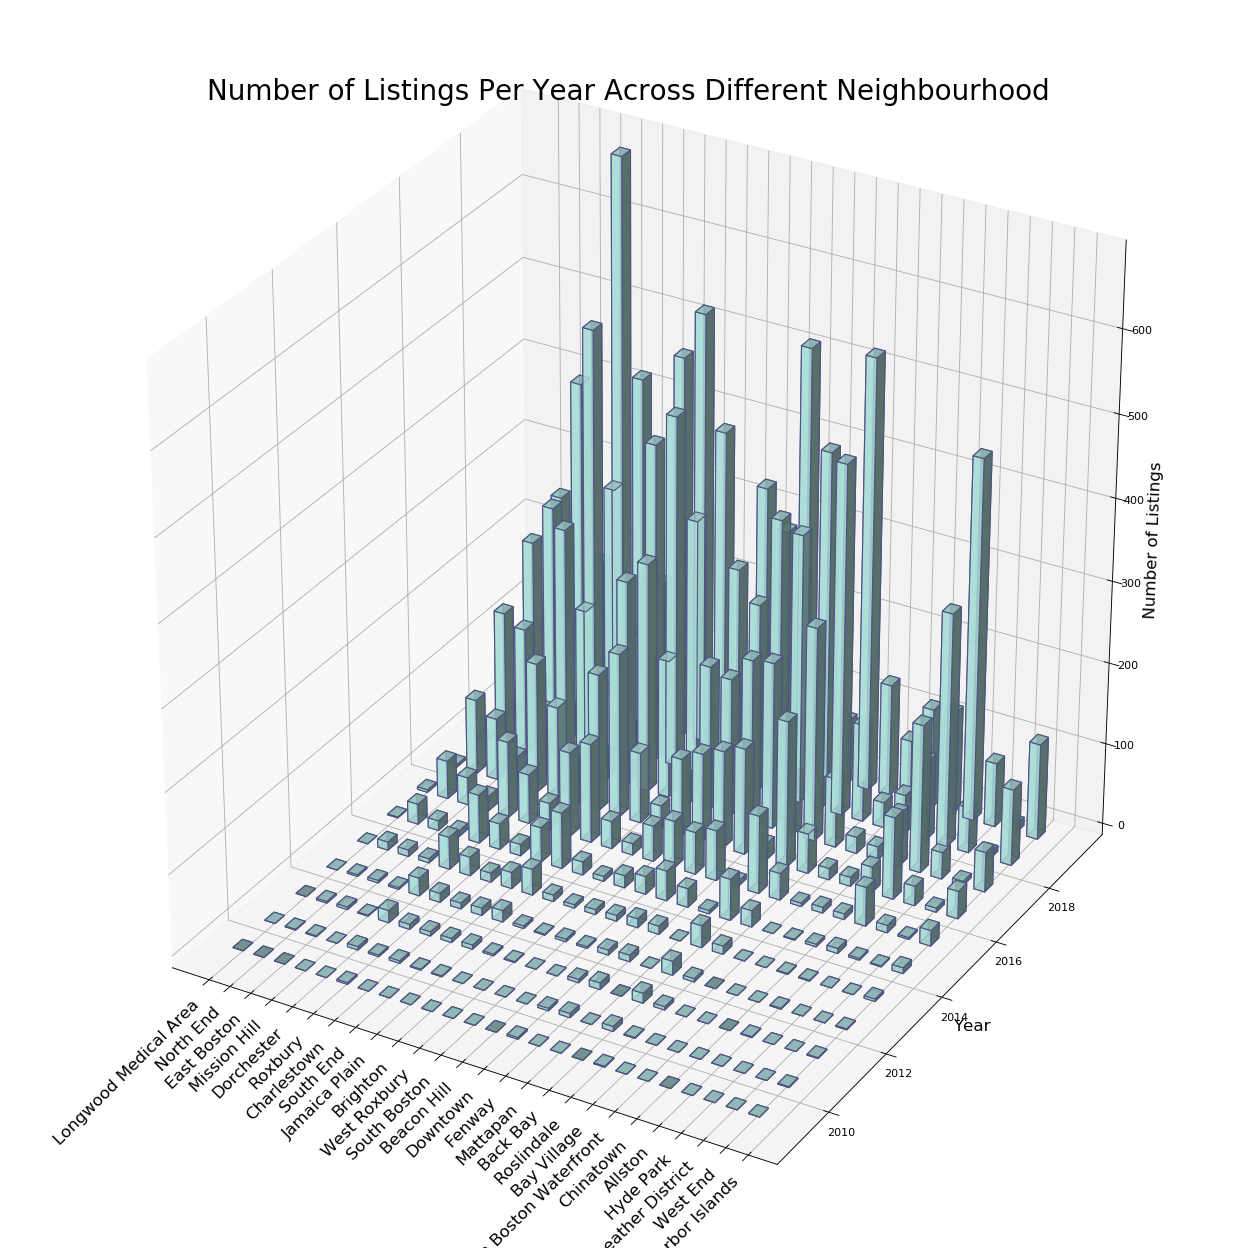

In [39]:
# draw
neighbourhood = temp.neighbourhood.tolist()
neighbourhood_id = list(range(1, 27))
Merge['neighbourhood_id'] = Merge.neighbourhood.replace(dict(zip(neighbourhood, neighbourhood_id)))

x3 = Merge.neighbourhood_id.to_list()
y3 = Merge.year.to_list()
z3 = np.zeros(Merge.shape[0])

dx = np.repeat(0.5, Merge.shape[0])
dy = np.repeat(0.3, Merge.shape[0])
dz = Merge.total_airbnbs.to_list()

fig = plt.figure(figsize = (20, 20), dpi = 80)
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x3, y3, z3, dx, dy, dz, shade = True, color = 'xkcd:duck egg blue', edgecolor = 'xkcd:dusk', alpha = 0.8)
ax.set_xticks(neighbourhood_id)
ax.set_xticklabels(neighbourhood, rotation = 45, horizontalalignment='right', fontsize=15)
ax.set_title('Number of Listings Per Year Across Different Neighbourhood', fontsize = 25)
ax.set_ylabel('Year', fontsize = 15)
ax.set_zlabel('Number of Listings', fontsize = 15)

Seasonality of Number of Reviews

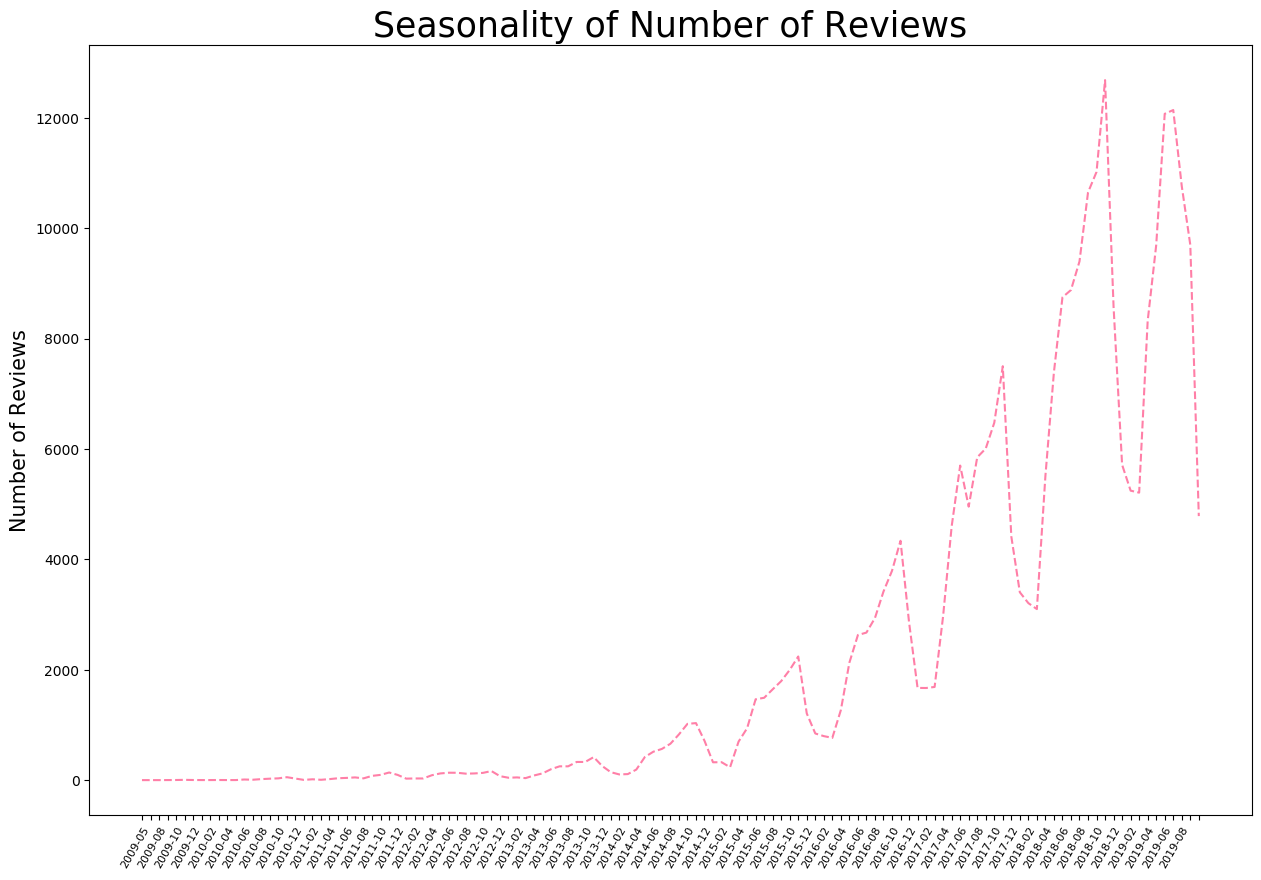

In [40]:
def A1():
    df1 = reviews_details[['listing_id', 'reviewer_id', 'date']].drop_duplicates()
    df1['year_month'] = df1.date.apply(lambda x: datetime.strftime(x, '%Y-%m'))
    df2 = df1.groupby('year_month').size().reset_index()
    return df2
YearMonthReviews = A1()
YearMonthReviews.columns = ['year_month', 'n_of_reviews']
labels = YearMonthReviews.year_month.copy()
labels[::2] = ''
plt.style.use('default')
fix, ax = plt.subplots(figsize = (15, 10))
ax.plot(YearMonthReviews.year_month, YearMonthReviews.n_of_reviews, linestyle = '--', color = 'xkcd:carnation pink')
ax.set_xticklabels(labels, rotation = 60, horizontalalignment='right', fontsize=8)
ax.set_ylabel('Number of Reviews', fontsize = 15)
ax.set_title('Seasonality of Number of Reviews', fontsize = 25)
plt.show()

Percentage of Room Type

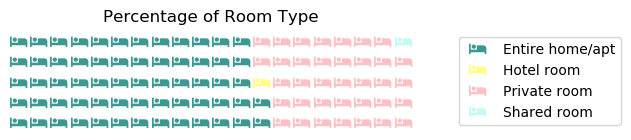

In [42]:
def A2():
    df1 = listings_details[['id', 'room_type']]
    df2 = df1.drop_duplicates()
    df4 = df2.groupby('room_type').size().reset_index()
    df4.columns = ['room_type', 'numbers']
    df4['percentage'] = df4.numbers * 100/ df4.numbers.sum()
    return df4
RoomType = A2()
data = dict(zip(RoomType.room_type, RoomType.percentage))
color = ['xkcd:sea', 'xkcd:butter', 'xkcd:pale rose', 'xkcd:duck egg blue']
fig = plt.figure(FigureClass=Waffle, rows=5, values=data, legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}, icons = 'bed', icon_size = 10, icon_legend = True, colors = color, title ={'label':'Percentage of Room Type'}) 

Seasonality of Price

In [ ]:
calendar['date'] = pd.to_datetime(calendar.date)
calendar['price'] = calendar.price.dropna().apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)
calendar['month'] = calendar.date.apply(lambda x: x.month)
calendar['weekday'] = calendar.date.apply(datetime.weekday)
calendar = calendar.sort_values('weekday')
calendar['weekday'] = calendar['weekday'].replace({0:'Mo', 1:'Tu', 2:'We', 3:'Th', 4:'Fr', 5:'Sa', 6:'Su'})
calendar2019 = calendar.query('date < "2020-01-01"')[['listing_id', 'date', 'price', 'month', 'weekday']]
calendar2020 = calendar.query('date >= "2020-01-01" and date < "2020-10-1"')[['listing_id', 'date', 'price', 'month', 'weekday']]

C2019 = calendar2019.groupby(['listing_id', 'month', 'weekday']).price.mean().reset_index()
C2019_mean = C2019.groupby(['month', 'weekday']).price.mean().reset_index()
C2020 = calendar2020.groupby(['listing_id', 'month', 'weekday']).price.mean().reset_index()
C2020_mean = C2020.groupby(['month', 'weekday']).price.mean().reset_index()

Text(0.5, 0, 'Month(2020)')

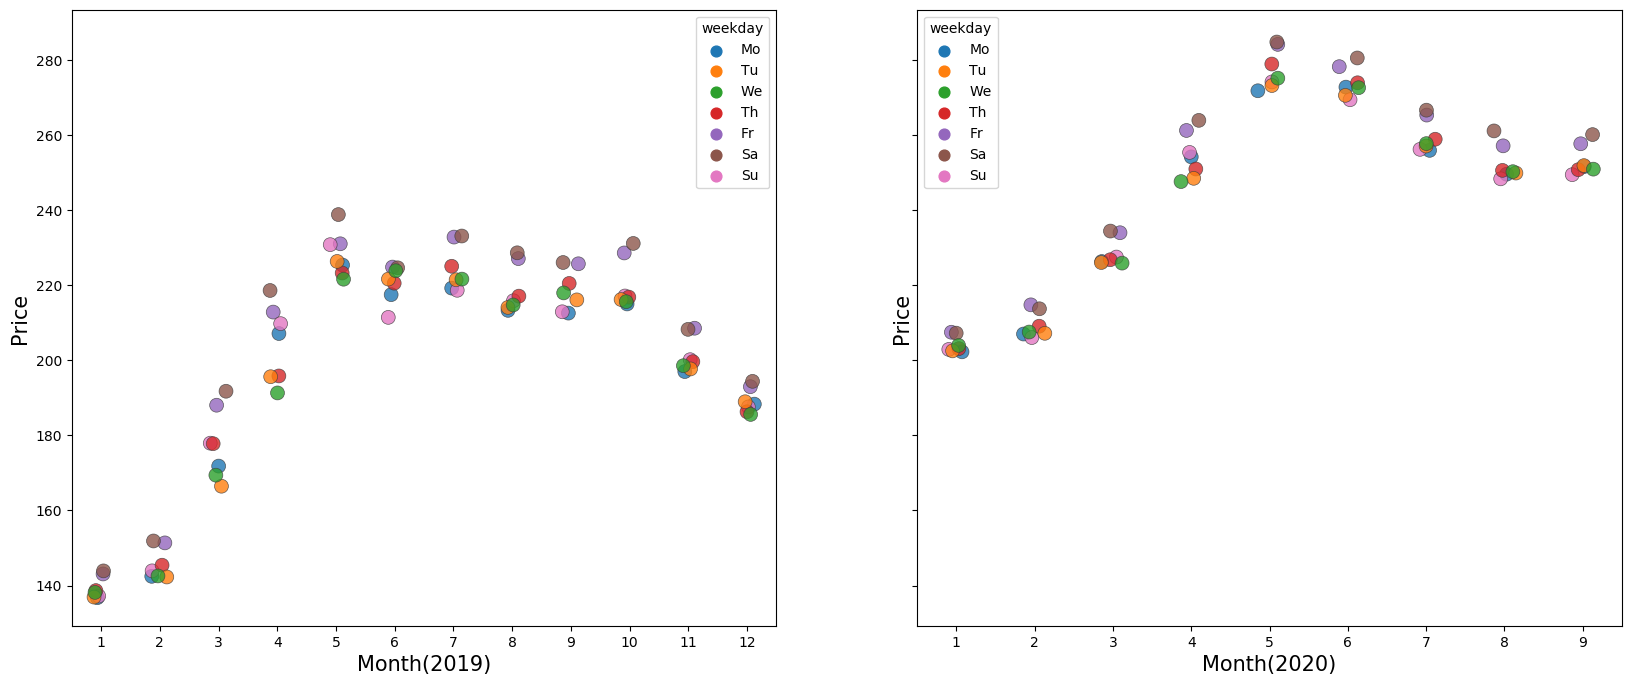

In [44]:
fig, ax = plt.subplots(1,2, figsize = (20, 8), sharey = True)
ax[0] = sns.stripplot('month', 'price', data = C2019_mean, ax = ax[0], hue = 'weekday', linewidth=.5, alpha = 0.8, s = 10, jitter = 0.15, hue_order = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'])
ax[0].set_ylabel('Price', fontsize = 15)
ax[0].set_xlabel('Month(2019)', fontsize = 15)
ax[1] = sns.stripplot('month', 'price', data = C2020_mean, ax = ax[1], hue = 'weekday', linewidth=.5, alpha = 0.8, s = 10, jitter = 0.15, hue_order = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'])
ax[1].set_ylabel('Price', fontsize = 15)
ax[1].set_xlabel('Month(2020)', fontsize = 15)


The Relationship Between Price and Rating for Different Room Types 

In [45]:
listings_details['price'] = listings_details['price'].apply(lambda x : x.replace('$', '').replace(',', '')).astype(float).sort_values(ascending = False)
listings_details['host_is_superhost'] = ['Yes' if str(i) == 't' else 'No' for i in listings_details['host_is_superhost']]

P = listings_details.query('room_type == "Private room" and price > 0')[['id', 'price', 'review_scores_rating', 'host_is_superhost']].copy().dropna().drop_duplicates()
S = listings_details.query('room_type == "Shared room" and price > 0')[['id', 'price', 'review_scores_rating', 'host_is_superhost']].copy().dropna().drop_duplicates()
E = listings_details.query('room_type == "Entire home/apt" and price > 0')[['id', 'price', 'review_scores_rating', 'host_is_superhost']].copy().dropna().drop_duplicates()
H = listings_details.query('room_type == "Hotel room" and price > 0 and price < 10000')[['id', 'price', 'review_scores_rating', 'host_is_superhost']].copy().dropna().drop_duplicates()

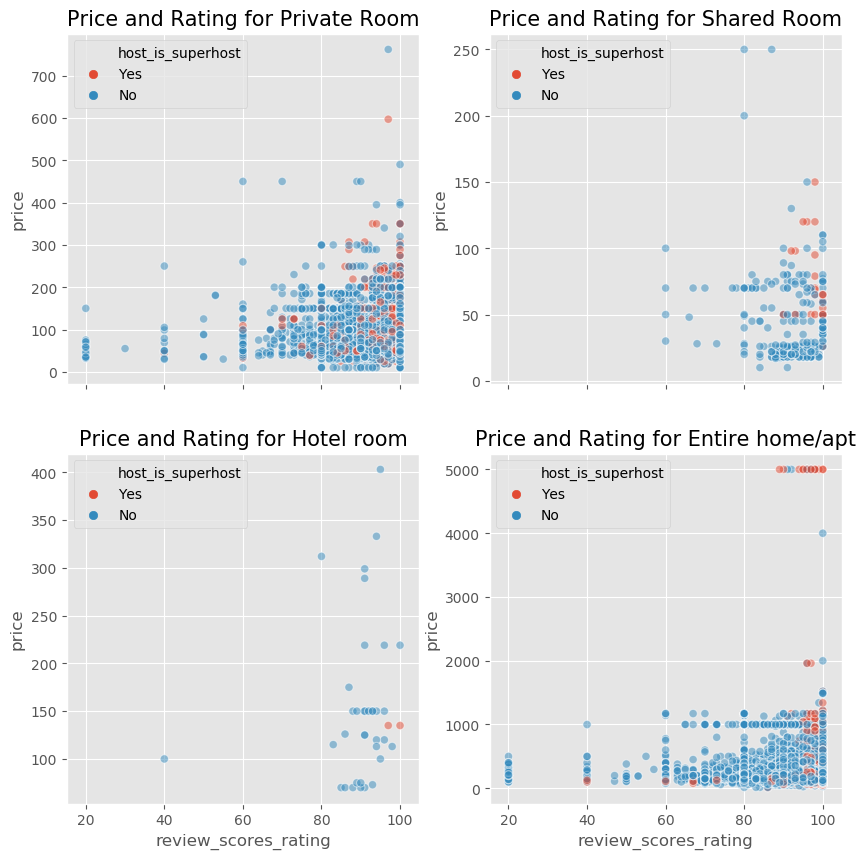

In [46]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize = (10, 10), sharex = True)
ax[0,0] = sns.scatterplot('review_scores_rating', 'price', ax = ax[0,0], data = P, hue = 'host_is_superhost', alpha = 0.5, hue_order = ['Yes', 'No'])
ax[0,0].set_title('Price and Rating for Private Room', fontsize = 15)
ax[0,1] = sns.scatterplot('review_scores_rating', 'price', ax = ax[0,1], data = S, hue = 'host_is_superhost', alpha = 0.5, hue_order = ['Yes', 'No'])
ax[0,1].set_title('Price and Rating for Shared Room', fontsize = 15)
ax[1,1] = sns.scatterplot('review_scores_rating', 'price', ax = ax[1,1], data = E, hue = 'host_is_superhost', alpha = 0.5,  hue_order = ['Yes', 'No'])
ax[1,1].set_title('Price and Rating for Entire home/apt', fontsize = 15)
ax[1,0] = sns.scatterplot('review_scores_rating', 'price', ax = ax[1,0], data = H, hue = 'host_is_superhost', alpha = 0.5,  hue_order = ['Yes', 'No'])
ax[1,0].set_title('Price and Rating for Hotel room', fontsize = 15)
plt.show()